In [22]:
#Pola Gnana Shekar
#21CS10052

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape) 

(1599, 12)


In [5]:
#to split the data into training, validation and testing.
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "../../dataset/linear-regression.csv"
data = pd.read_csv(dataset_path)

# Split the dataset into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.375, random_state=42)  # 0.375 = 30% of the original data

# Print the sizes of the splits
print(f"Training set size: {train_data.shape[0]}")
print(f"Validation set size: {val_data.shape[0]}")
print(f"Testing set size: {test_data.shape[0]}")

Training set size: 799
Validation set size: 480
Testing set size: 320


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
dataset_path = "../../dataset/linear-regression.csv"
data = pd.read_csv(dataset_path)

# Split the dataset into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.375, random_state=42)  # 0.375 = 30% of the original data

# Prepare data for training, validation, and testing
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_validation = val_data.iloc[:, :-1].values
y_validation = val_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

# Evaluate the model
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

# Calculate metrics for training, validation, and test sets
r2_train, rmse_train = calculate_metrics(y_train, model.predict(X_train))
r2_validation, rmse_validation = calculate_metrics(y_validation, y_pred_validation)
r2_test, rmse_test = calculate_metrics(y_test, y_pred_test)

# Display the results
print("Training Set Metrics:")
print("R-squared score:", r2_train)
print("RMSE score:", rmse_train)
print("\nValidation Set Metrics:")
print("R-squared score:", r2_validation)
print("RMSE score:", rmse_validation)
print("\nTest Set Metrics:")
print("R-squared score:", r2_test)
print("RMSE score:", rmse_test)


Training Set Metrics:
R-squared score: 0.35038464463582664
RMSE score: 0.660790294050693

Validation Set Metrics:
R-squared score: 0.3279296678927427
RMSE score: 0.6417555480263113

Test Set Metrics:
R-squared score: 0.41047417089904137
RMSE score: 0.6206920199022873


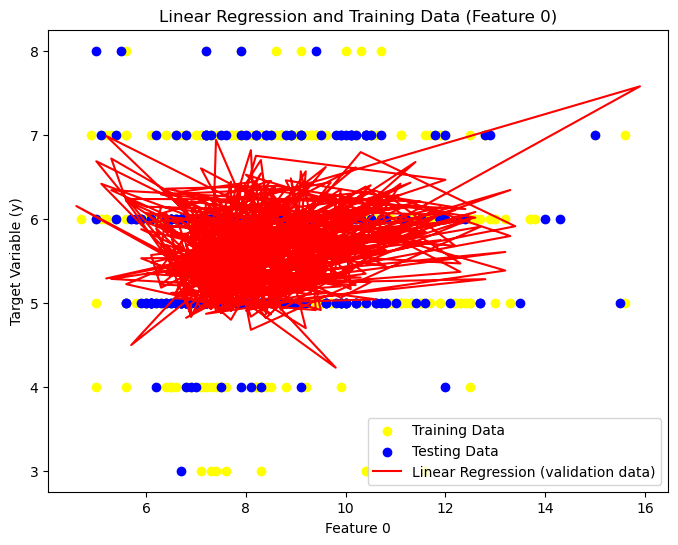

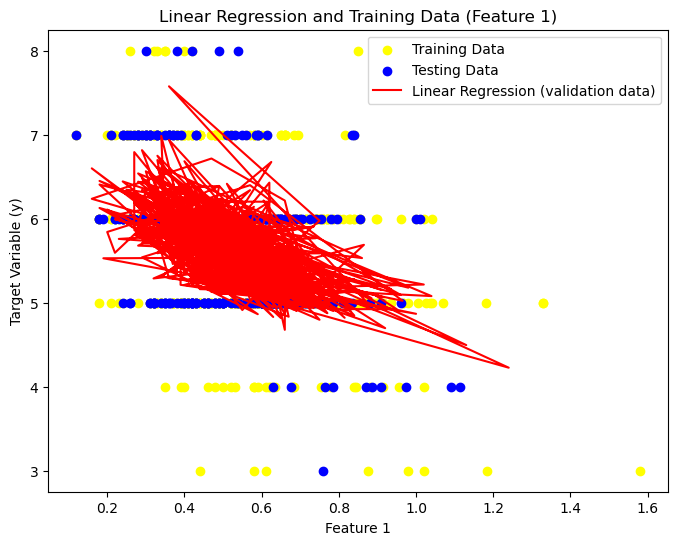

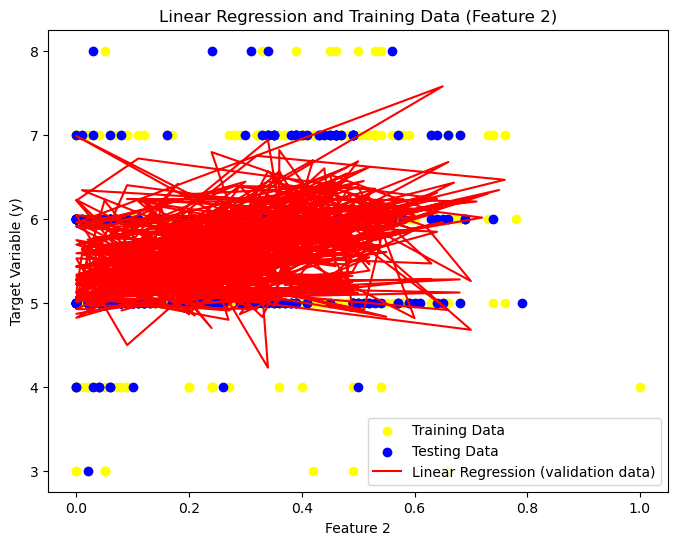

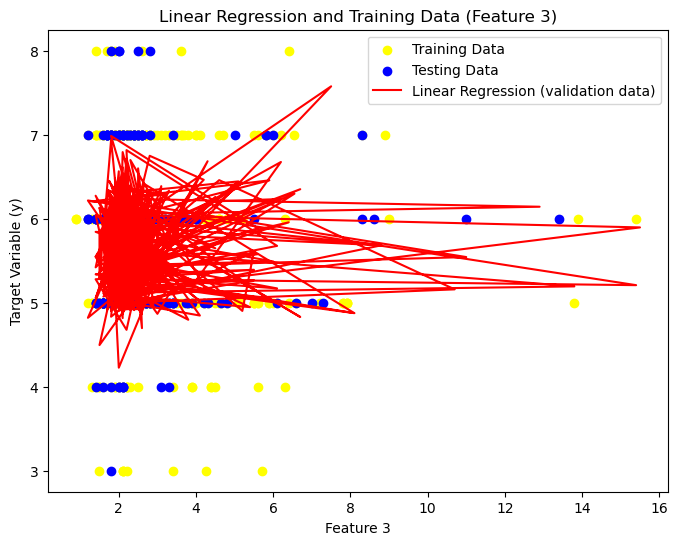

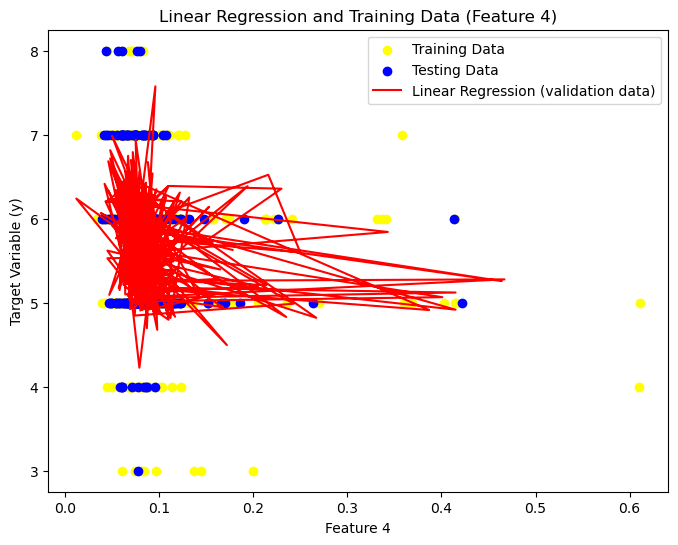

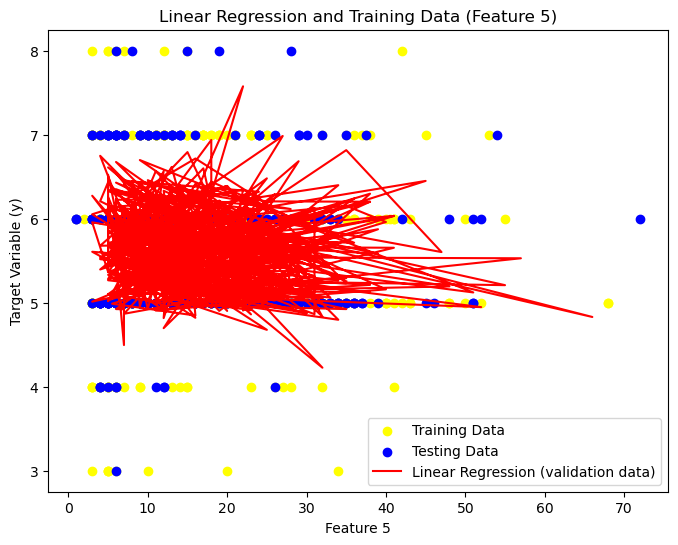

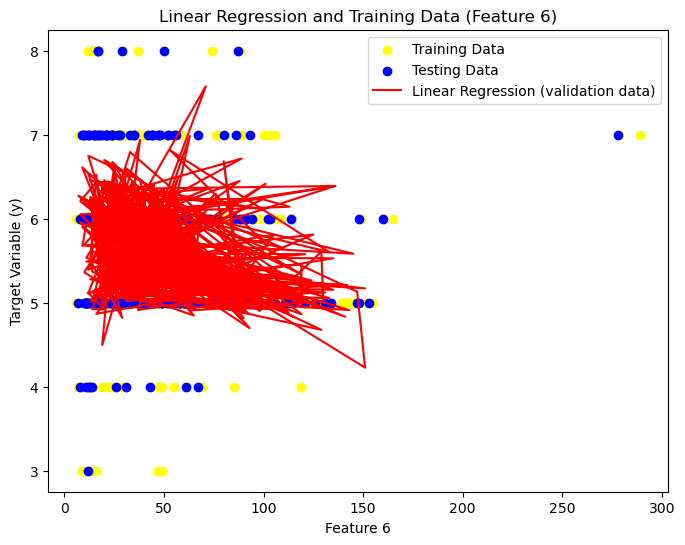

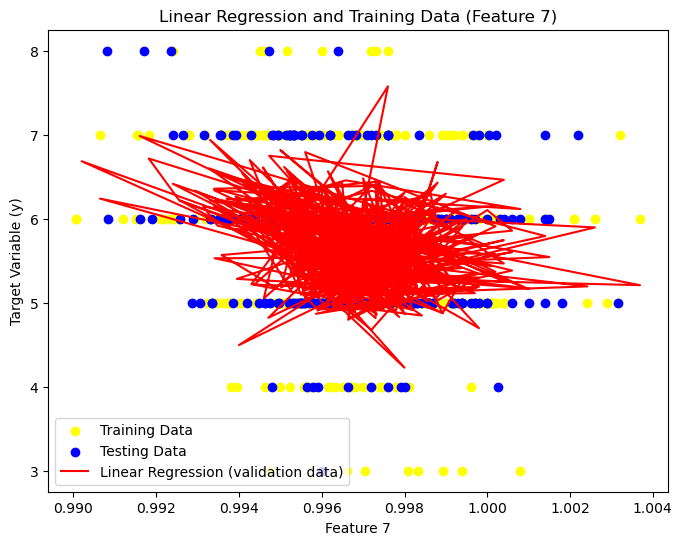

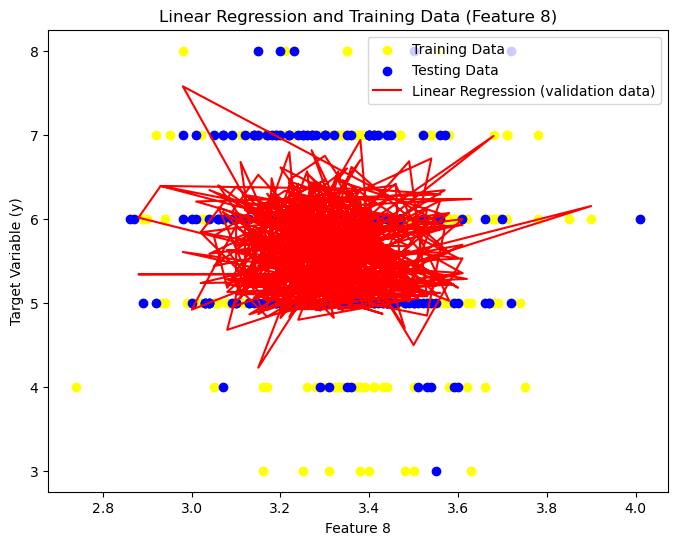

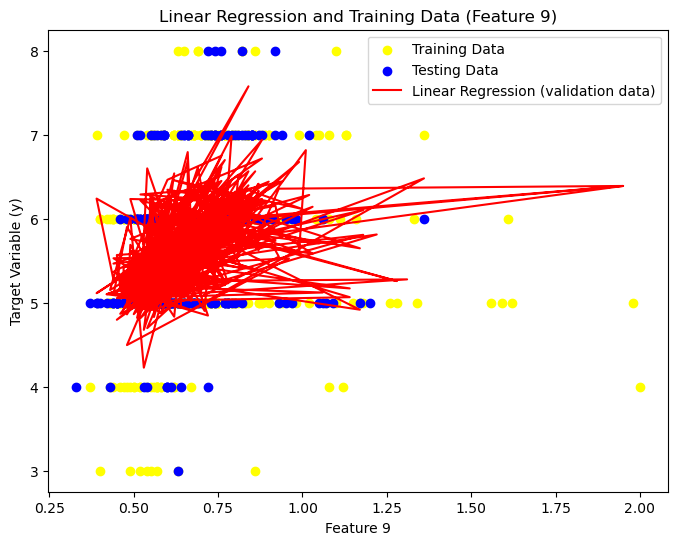

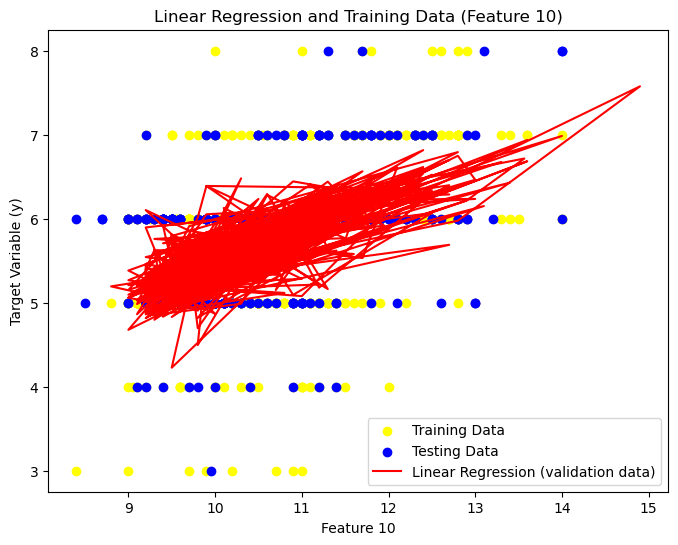

In [19]:
import matplotlib.pyplot as plt

num_features = X_train.shape[1] # Number of features
for feature_idx in range(num_features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, feature_idx], y_train, label='Training Data', color='yellow')
    plt.scatter(X_test[:, feature_idx], y_test, label='Testing Data', color='blue')
    plt.plot(X_validation[:, feature_idx], y_pred_validation, label='Linear Regression (validation data)', color='red')
    plt.xlabel('Feature {}'.format(feature_idx))
    plt.ylabel('Target Variable (y)')
    plt.legend()
    plt.title('Linear Regression and Training Data (Feature {})'.format(feature_idx))
    plt.show()

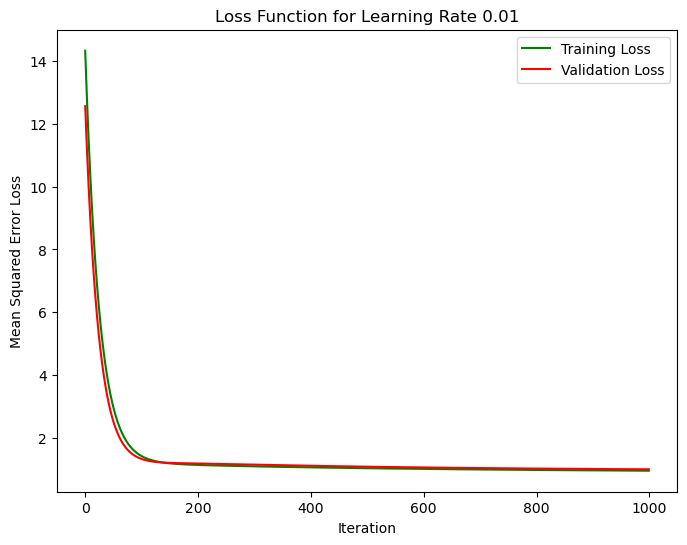

Learning Rate: 0.01
R-squared score for test set: -0.5497361579240279
RMSE score for test set: 1.0063606012203838




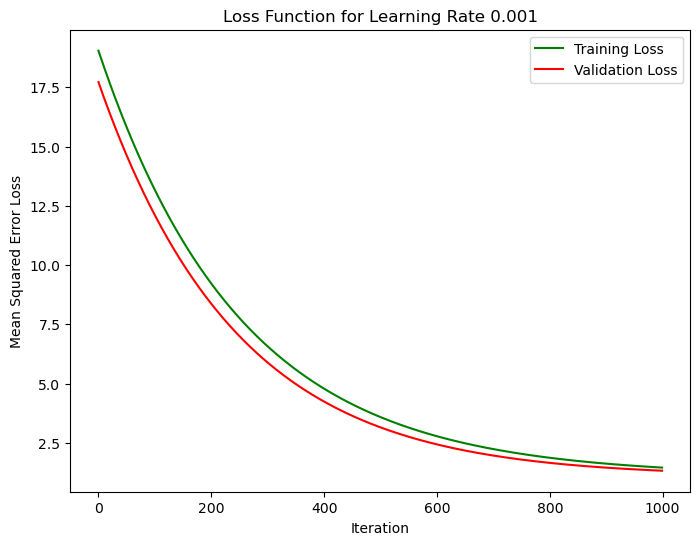

Learning Rate: 0.001
R-squared score for test set: -0.9427209709287399
RMSE score for test set: 1.1267562015061734




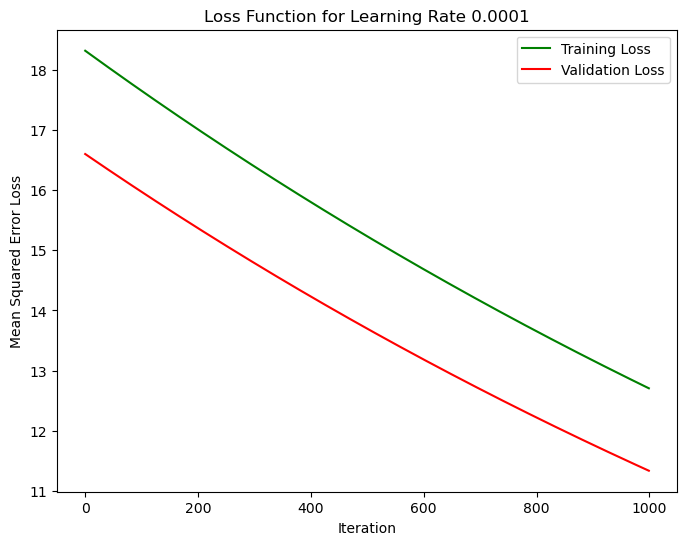

Learning Rate: 0.0001
R-squared score for test set: -18.420378007469996
RMSE score for test set: 3.562489413199572




In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
dataset_path = "../../dataset/linear-regression.csv"
data = pd.read_csv(dataset_path)

# Split the dataset into training, validation, and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.375, random_state=42)

# Prepare data for training, validation, and testing
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_validation = val_data.iloc[:, :-1].values
y_validation = val_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Define the gradient ascent function with feature scaling
def gradient_ascent_with_scaling(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.random.rand(num_features)  # Initialize parameters with random values
    loss_history_train = []
    loss_history_val = []

    X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    for _ in range(num_iterations):
        y_pred = np.dot(X_scaled, theta)
        gradient = -2 * np.dot(X_scaled.T, y - y_pred) / num_samples
        theta -= learning_rate * gradient

        loss_train = np.mean((y - y_pred) ** 2)
        loss_history_train.append(loss_train)

        X_validation_scaled = (X_validation - np.min(X_validation, axis=0)) / (np.max(X_validation, axis=0) - np.min(X_validation, axis=0))
        y_pred_validation = np.dot(X_validation_scaled, theta)
        loss_val = np.mean((y_validation - y_pred_validation) ** 2)
        loss_history_val.append(loss_val)

    return theta, loss_history_train, loss_history_val

# Define hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
num_iterations = 1000

# Initialize lists to store results
r2_scores = []
rmse_scores = []

# Perform gradient ascent with scaling for each learning rate
for learning_rate in learning_rates:
    # Train the model using gradient ascent with feature scaling
    theta, loss_history_train, loss_history_val = gradient_ascent_with_scaling(X_train, y_train, learning_rate, num_iterations)

    # Make predictions for the test set
    X_test_scaled = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))
    y_pred_test = np.dot(X_test_scaled, theta)

    # Calculate R-squared and RMSE for the test set
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    # Plot the loss function for the training and validation sets
    plt.figure(figsize=(8, 6))
    plt.plot(range(num_iterations), loss_history_train, label='Training Loss', color='green')
    plt.plot(range(num_iterations), loss_history_val, label='Validation Loss', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error Loss')
    plt.title(f'Loss Function for Learning Rate {learning_rate}')
    plt.legend()
    plt.show()

    # Store R-squared and RMSE scores
    r2_scores.append(r2_test)
    rmse_scores.append(rmse_test)

    print(f"Learning Rate: {learning_rate}")
    print(f"R-squared score for test set: {r2_test}")
    print(f"RMSE score for test set: {rmse_test}")
    print("\n")
